# PROJET APPRENTISSAGE SUPERVISE

Le projet de data science a pour objectif la mise en pratique des algorithmes d’apprentissage
supervisé vu en cours (Bayésien Naïf, KNN, LDA, LR, QDA, Linear SVM, SVM, Cart, Random forest)
et de réaliser une étude comparative de ces différentes approches de classification sur le jeu de donnée : Crédit Bancaire

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import scipy.stats
import plotly.express as px
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from pandas.plotting import scatter_matrix
from sklearn import svm
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn import preprocessing
plt.style.use('ggplot')
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

## Charger le tableau sous format DataFrame:

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/german.csv", header = None,   names = ["Statut du compte courant existant", "Durée en mois", "Historique de crédit", "Objectif", "Montant du crédit", "Compte d'épargne", "Emploi actuel depuis", "Taux de versement en pourcentage du revenu disponible", "Statut personnel et sexe", "Autres débiteurs","Résidence actuelle depuis", "Propriété", "Age en années", "Autres plans de versement", "Logement", "Nombre de crédits existants dans cette banque", "Travail", "Nombre de personnes à charge", "Téléphone", "Travailleur étranger", "y"])

In [ ]:
data.shape

(1000, 21)

In [ ]:
data.head()

,Statut du compte courant existant,Durée en mois,Historique de crédit,Objectif,Montant du crédit,Compte d'épargne,Emploi actuel depuis,Taux de versement en pourcentage du revenu disponible,Statut personnel et sexe,Autres débiteurs,Résidence actuelle depuis,Propriété,Age en années,Autres plans de versement,Logement,Nombre de crédits existants dans cette banque,Travail,Nombre de personnes à charge,Téléphone,Travailleur étranger,y
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Statut du compte courant existant                      1000 non-null   object
 1   Durée en mois                                          1000 non-null   int64 
 2   Historique de crédit                                   1000 non-null   object
 3   Objectif                                               1000 non-null   object
 4   Montant du crédit                                      1000 non-null   int64 
 5   Compte d'épargne                                       1000 non-null   object
 6   Emploi actuel depuis                                   1000 non-null   object
 7   Taux de versement en pourcentage du revenu disponible  1000 non-null   int64 
 8   Statut personnel et sexe                               1000

### Missing values

In [ ]:
data.isna().sum()

Statut du compte courant existant                        0
Durée en mois                                            0
Historique de crédit                                     0
Objectif                                                 0
Montant du crédit                                        0
Compte d'épargne                                         0
Emploi actuel depuis                                     0
Taux de versement en pourcentage du revenu disponible    0
Statut personnel et sexe                                 0
Autres débiteurs                                         0
Résidence actuelle depuis                                0
Propriété                                                0
Age en années                                            0
Autres plans de versement                                0
Logement                                                 0
Nombre de crédits existants dans cette banque            0
Travail                                                 

Le jeu de données ne contient pas de valeurs manquantes

L'ensemble de données comprend 1000 exemples et 20 variables, dont 7
numériques (entiers) et 13 catégorielles, ainsi qu'une variable à prédire :  client est bon ou mauvais

## Analyse Univarié


## Données quantitatives / qualitatives

In [ ]:
data = data.astype({
    "Taux de versement en pourcentage du revenu disponible":"object",
})

In [ ]:
quanti = data.select_dtypes(exclude=['object'])

In [ ]:
quanti.head()

,Durée en mois,Montant du crédit,Résidence actuelle depuis,Age en années,Nombre de crédits existants dans cette banque,Nombre de personnes à charge,y
0,6,1169,4,67,2,1,1
1,48,5951,2,22,1,1,2
2,12,2096,3,49,1,2,1
3,42,7882,4,45,1,2,1
4,24,4870,4,53,2,2,2


In [ ]:
quali  = data.select_dtypes(exclude=['int64'])

In [ ]:
quali.head()

,Statut du compte courant existant,Historique de crédit,Objectif,Compte d'épargne,Emploi actuel depuis,Taux de versement en pourcentage du revenu disponible,Statut personnel et sexe,Autres débiteurs,Propriété,Autres plans de versement,Logement,Travail,Téléphone,Travailleur étranger
0,A11,A34,A43,A65,A75,4,A93,A101,A121,A143,A152,A173,A192,A201
1,A12,A32,A43,A61,A73,2,A92,A101,A121,A143,A152,A173,A191,A201
2,A14,A34,A46,A61,A74,2,A93,A101,A121,A143,A152,A172,A191,A201
3,A11,A32,A42,A61,A74,2,A93,A103,A122,A143,A153,A173,A191,A201
4,A11,A33,A40,A61,A73,3,A93,A101,A124,A143,A153,A173,A191,A201


1    700
2    300
Name: y, dtype: int64


<BarContainer object of 2 artists>

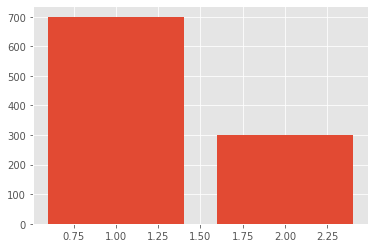

In [ ]:
labels_count = data["y"].value_counts()
print(labels_count)
plt.bar(labels_count.index, labels_count)

In [ ]:
px.pie(data,names='y')

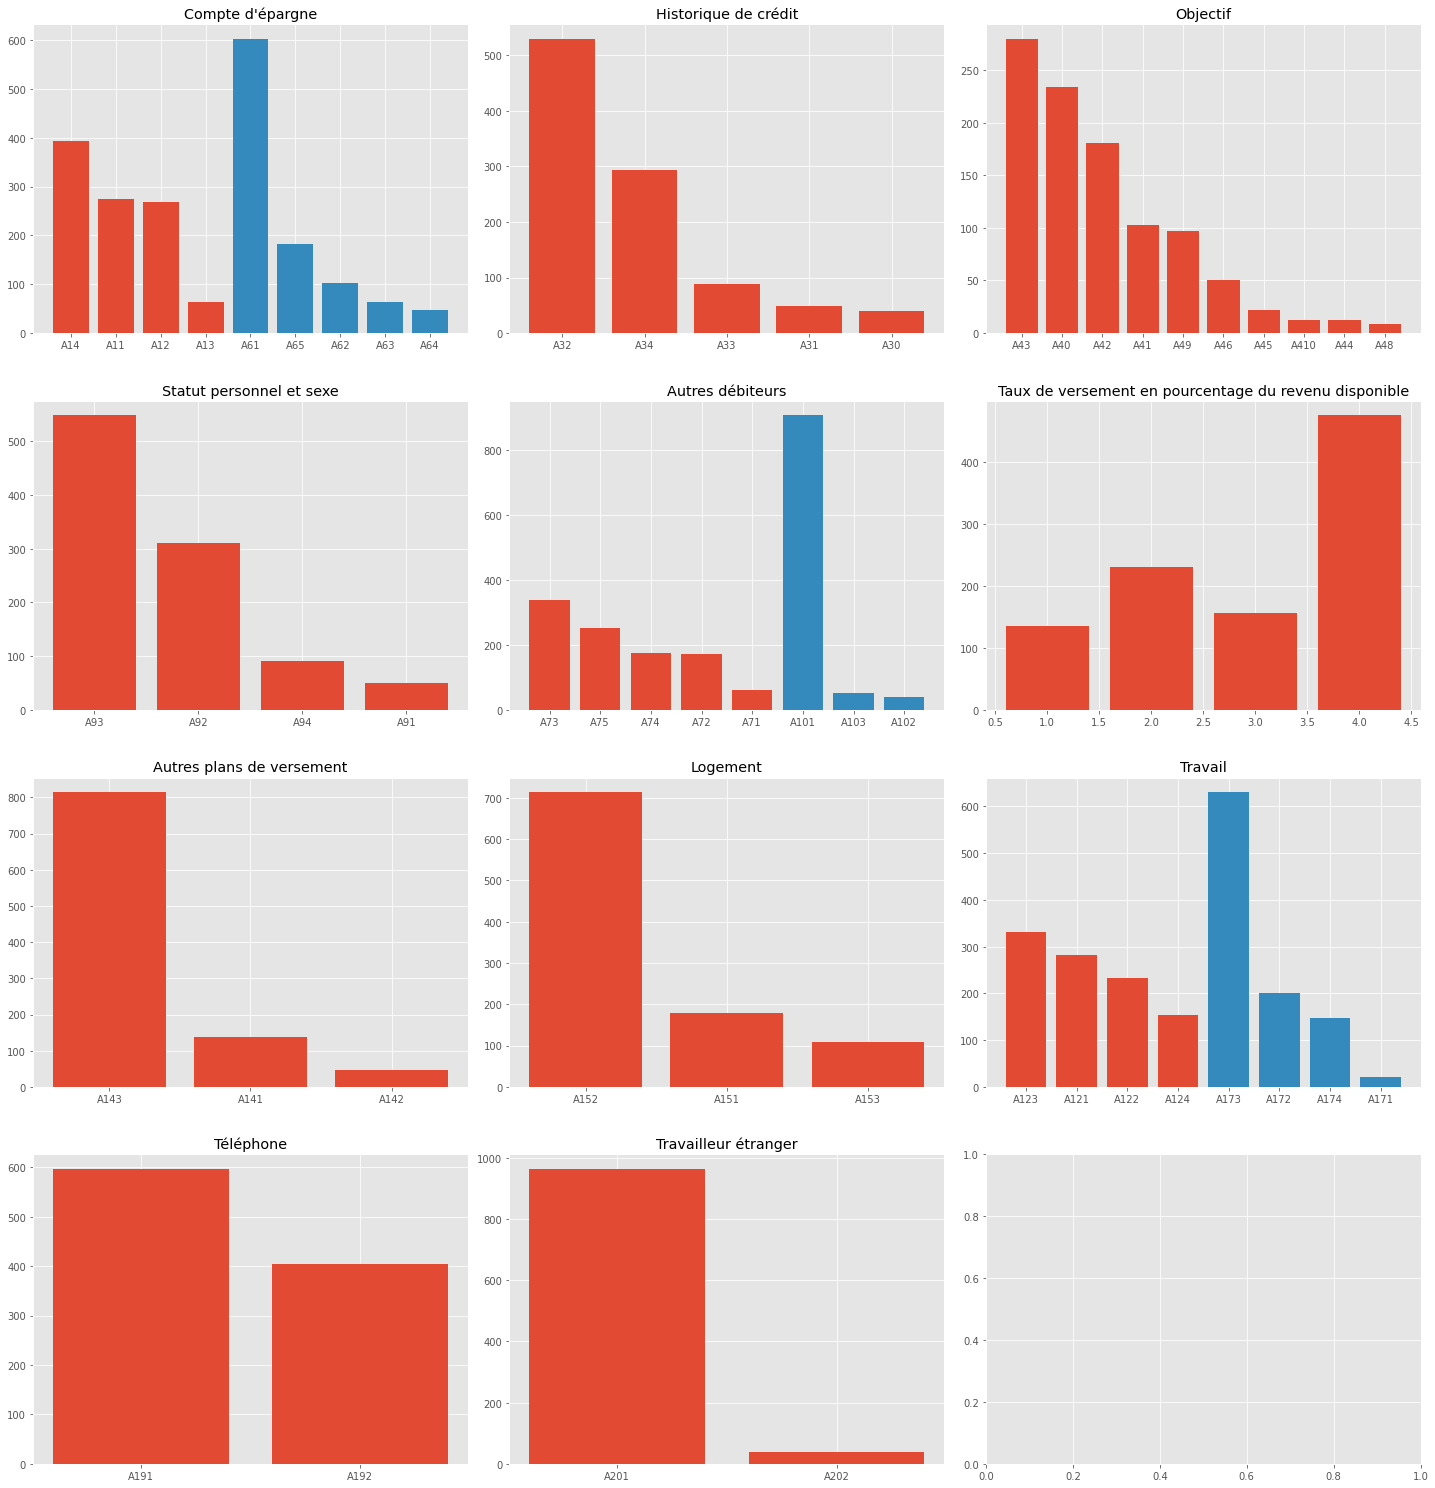

In [ ]:
fig, axs = plt.subplots(4, 3, figsize=(20, 10))
fig.tight_layout()
fig.subplots_adjust(top=3, bottom=1)

for i, col in enumerate(quali.columns):
    counts = quali[col].value_counts()
    axs[i//4, i%3].bar(counts.index, counts)
    axs[i//4, i%3].set_title(col)

In [ ]:
data.describe()

,Durée en mois,Montant du crédit,Taux de versement en pourcentage du revenu disponible,Résidence actuelle depuis,Age en années,Nombre de crédits existants dans cette banque,Nombre de personnes à charge,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


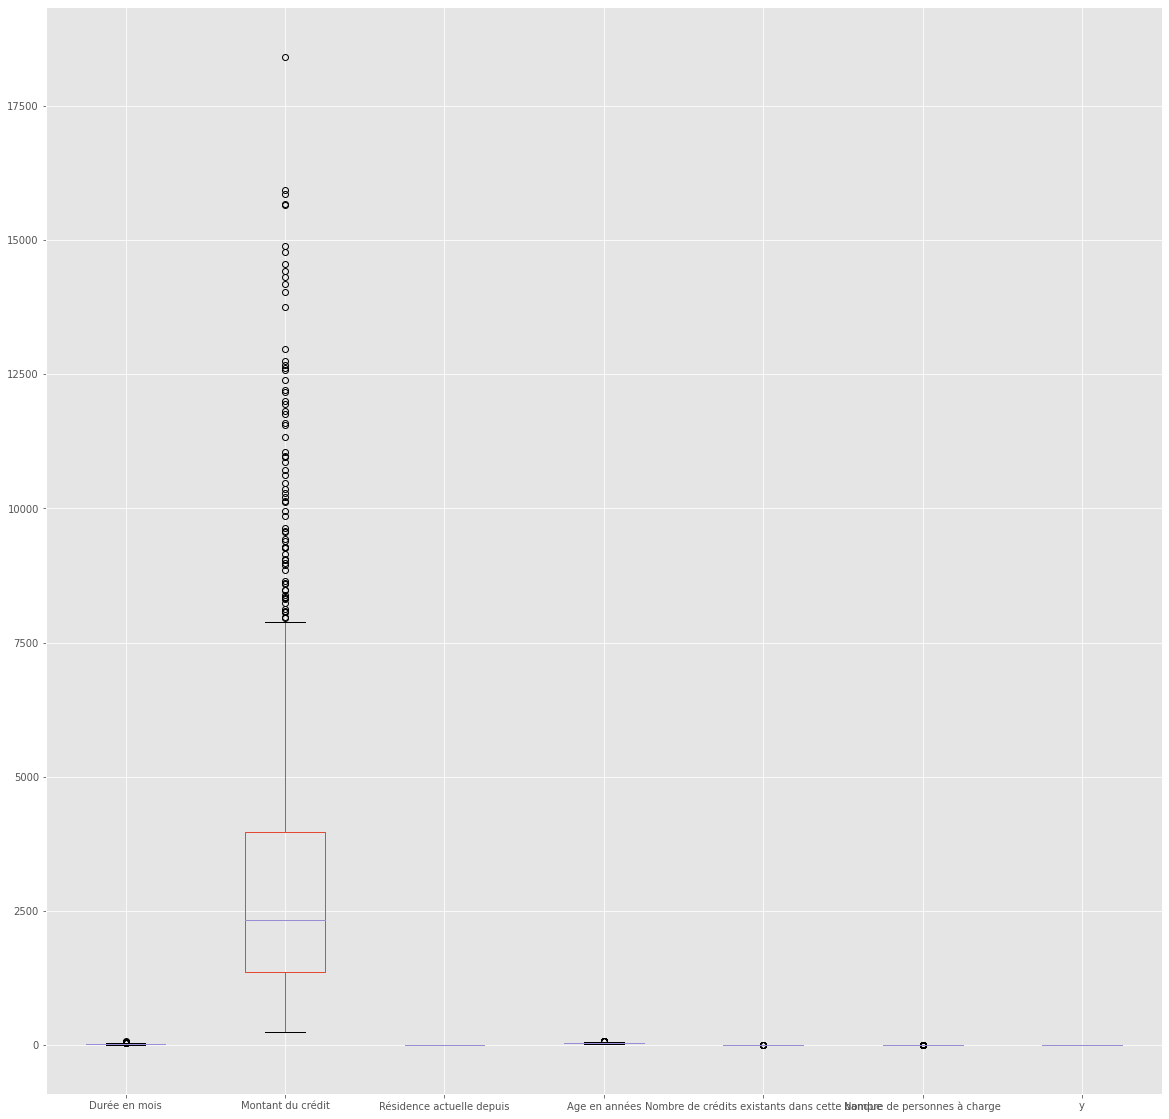

In [ ]:
data.boxplot(figsize=(20,20))

### Histogrammes

''

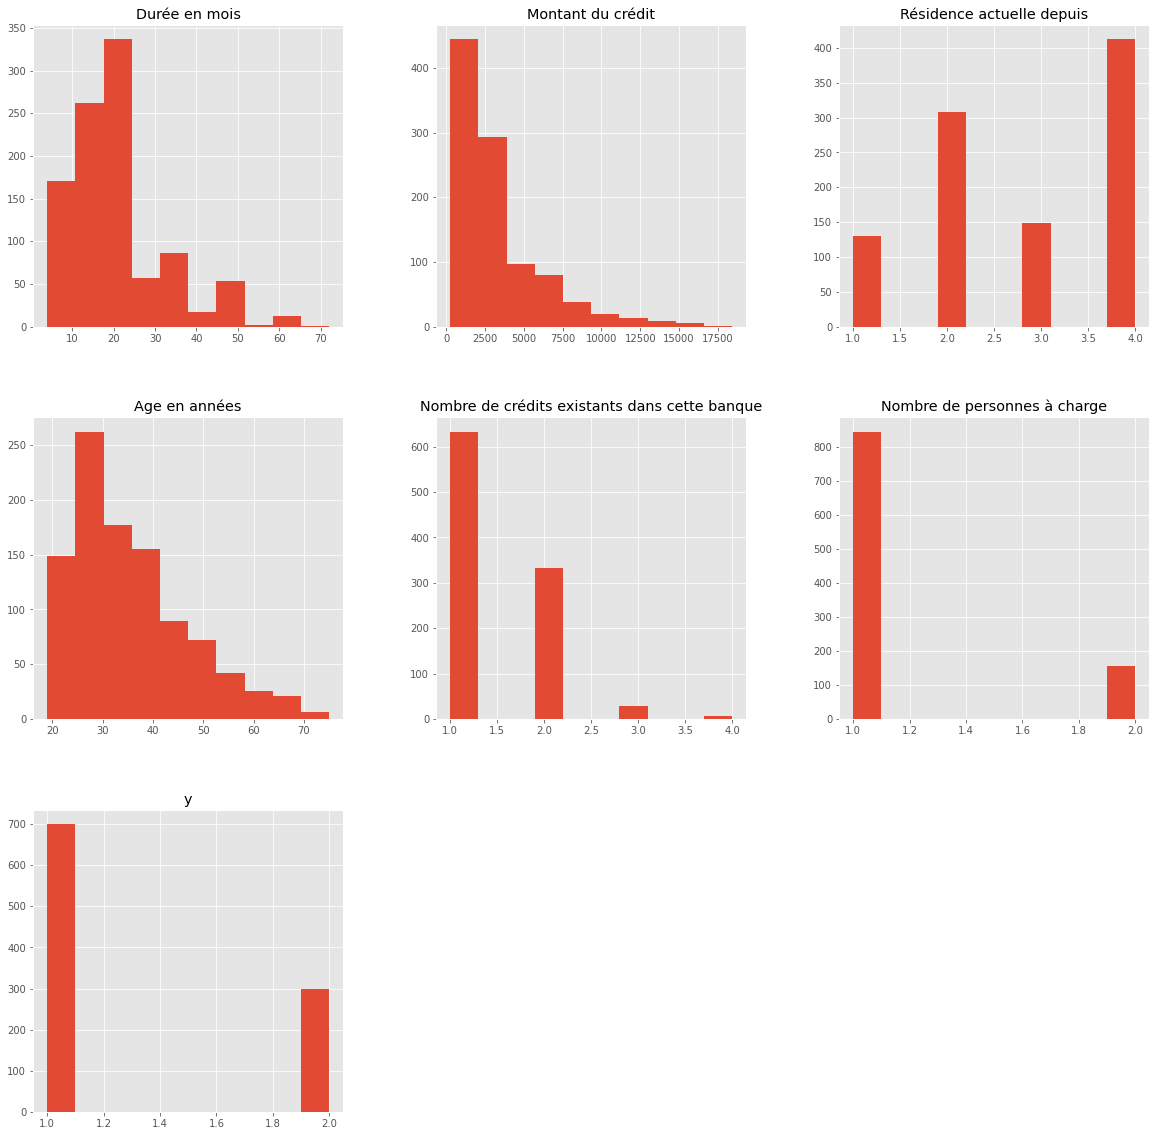

In [ ]:
quanti.hist(figsize=(20,20))
""

Nous remarquons d’après le diagramme en barres des effectifs  et le pie chart que les classes sont
déséquilibrées. La classe majoritaire contient 700 observations soit 70% des données alors que l'autre classe en
contient  que 300 soit seulement 30% des données. Ce problème devra alors être géré par resampling des classes. Nous
utiliserons dans notre cas la méthode de upsampling SMOTE.

## Analyse Bivarié

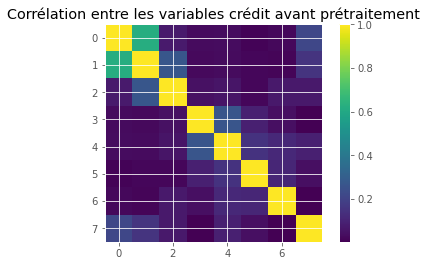

In [ ]:
corr= np.abs(data.corr())
plt.imshow(corr)
plt.title('Corrélation entre les variables crédit avant prétraitement')
plt.colorbar()
plt.show()

### Barplot des variables catégorielles

## PRETRAITEMENT



## Données quantitatives seulement (Prétraitement 1)

In [ ]:
data["y"]=data["y"]-1

In [ ]:
quanti = quanti.drop(["y"], axis=1)

In [ ]:
centered_quanti = (quanti-quanti.mean())/quanti.std()
validation_size = 0.3
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(centered_quanti, data["y"], test_size=validation_size, random_state=seed)

In [ ]:
num_folds = 10
seed = 7
scoring = 'f1'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM_LIN', SVC(kernel="linear", probability=True)))
models.append(('SVM_POLY', SVC(kernel="poly", probability=True)))
models.append(('SVM_RBF', SVC(kernel="rbf", probability=True)))

results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.202290 (0.111954)
LDA: 0.222007 (0.102764)
QDA: 0.354587 (0.113805)
KNN: 0.255668 (0.093588)
CART: 0.394387 (0.086426)
RF: 0.382959 (0.091055)
NB: 0.337166 (0.129370)
SVM_LIN: 0.000000 (0.000000)
SVM_POLY: 0.146162 (0.081167)
SVM_RBF: 0.203842 (0.115481)


In [ ]:
for name, model in models:
	model.fit(X_train, Y_train)

| LR | 72.33 | 0.5059 | 0.3789 |
              precision    recall  f1-score   support

         Oui     0.7376    0.9585    0.8337       217
         Non     0.5000    0.1084    0.1782        83

    accuracy                         0.7233       300
   macro avg     0.6188    0.5335    0.5059       300
weighted avg     0.6719    0.7233    0.6523       300

| LDA | 72.67 | 0.5157 | 0.3713 |
              precision    recall  f1-score   support

         Oui     0.7402    0.9585    0.8353       217
         Non     0.5263    0.1205    0.1961        83

    accuracy                         0.7267       300
   macro avg     0.6333    0.5395    0.5157       300
weighted avg     0.6810    0.7267    0.6585       300

| QDA | 70.33 | 0.5393 | 0.4002 |
              precision    recall  f1-score   support

         Oui     0.7443    0.8986    0.8142       217
         Non     0.4211    0.1928    0.2645        83

    accuracy                         0.7033       300
   macro avg     0.5827    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



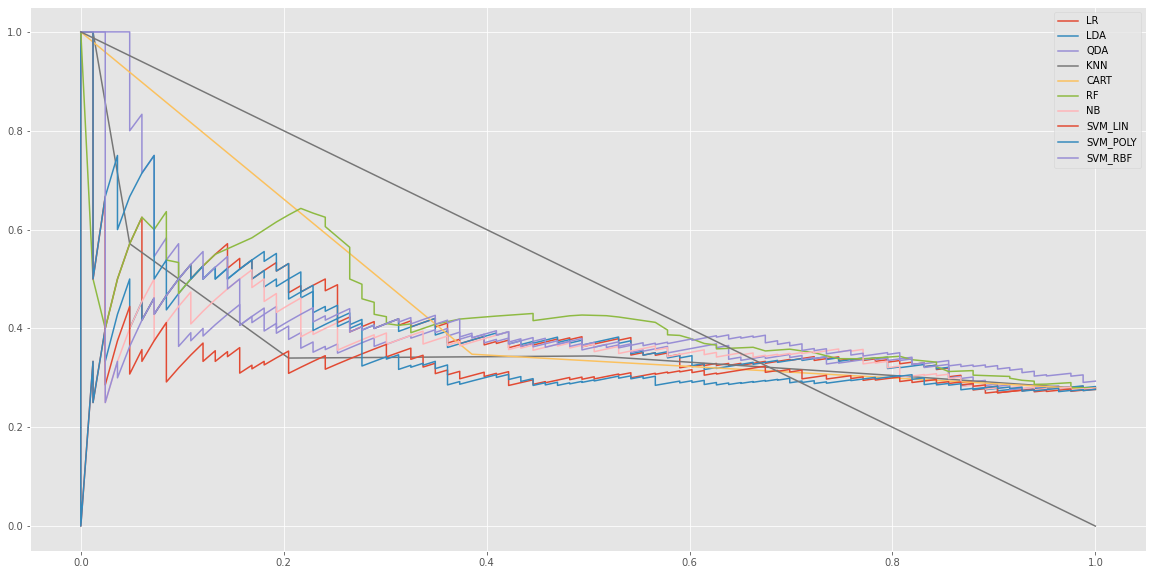

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
i=0
for name, model in models:
    pred_prob = model.predict_proba(X_validation)
    pred = model.predict(X_validation)
    accuracy = (pred == Y_validation).sum()/len(X_validation) * 100
    fscore = f1_score(Y_validation, pred, average='macro')
    precision, recall, thresholds = precision_recall_curve(Y_validation, pred_prob[:,1])

    print("| {} | {:.2f} | {:.4F} | {:.4f} |".format(name, accuracy, fscore, auc(recall, precision)))
    print(classification_report(Y_validation, pred, target_names=["Oui", "Non"], digits=4))

    ax.plot(recall, precision, label=name)

    i+=1
plt.plot([0,1], [1, 0])
plt.legend()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



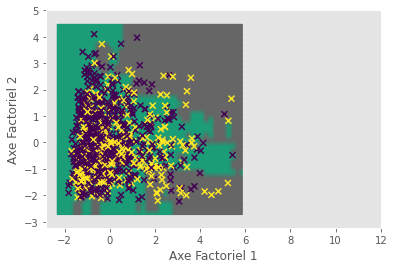

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
centered_quanti = (quanti - quanti.mean())/quanti.std()
X_train_pca = pca.fit_transform(centered_quanti)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train_pca[:,0].min() - .5, X_train_pca[:,0].max() + .5
y_min, y_max = X_train_pca[:,1].min() - .5, X_train_pca[:,1].max() + .5
h = 0.2  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = models[5][1].predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Dark2, shading="gouraud")


plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = data["y"], marker="x")
plt.xlim(X_train_pca[:,0].min()-1, 12)
plt.ylim(X_train_pca[:,1].min()-1, 5)
plt.xlabel("Axe Factoriel 1")
plt.ylabel("Axe Factoriel 2")
plt.show()

## Données quantitatives : SMOTED (Prétraitement 2)

In [ ]:
s = SMOTE()
X_train_smote, Y_train_smote = s.fit_resample(X_train, Y_train)

In [ ]:
num_folds = 20
seed = 7
scoring = 'f1'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM_LIN', SVC(kernel="linear", probability=True)))
models.append(('SVM_POLY', SVC(kernel="poly", probability=True)))
models.append(('SVM_RBF', SVC(kernel="rbf", probability=True)))
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
	cv_results = cross_val_score(model, X_train_smote, Y_train_smote, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.540412 (0.108806)
LDA: 0.539103 (0.107770)
QDA: 0.539999 (0.099161)
KNN: 0.705368 (0.073134)
CART: 0.668801 (0.089097)
RF: 0.741189 (0.065620)
NB: 0.479427 (0.100155)
SVM_LIN: 0.513168 (0.097033)
SVM_POLY: 0.516625 (0.111167)
SVM_RBF: 0.632756 (0.093918)


In [ ]:
for name, model in models:
	model.fit(X_train, Y_train)

| LR | 72.33 | 0.5059 | 0.3789 |
              precision    recall  f1-score   support

         Oui     0.7376    0.9585    0.8337       217
         Non     0.5000    0.1084    0.1782        83

    accuracy                         0.7233       300
   macro avg     0.6188    0.5335    0.5059       300
weighted avg     0.6719    0.7233    0.6523       300

| LDA | 72.67 | 0.5157 | 0.3713 |
              precision    recall  f1-score   support

         Oui     0.7402    0.9585    0.8353       217
         Non     0.5263    0.1205    0.1961        83

    accuracy                         0.7267       300
   macro avg     0.6333    0.5395    0.5157       300
weighted avg     0.6810    0.7267    0.6585       300

| QDA | 70.33 | 0.5393 | 0.4002 |
              precision    recall  f1-score   support

         Oui     0.7443    0.8986    0.8142       217
         Non     0.4211    0.1928    0.2645        83

    accuracy                         0.7033       300
   macro avg     0.5827    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



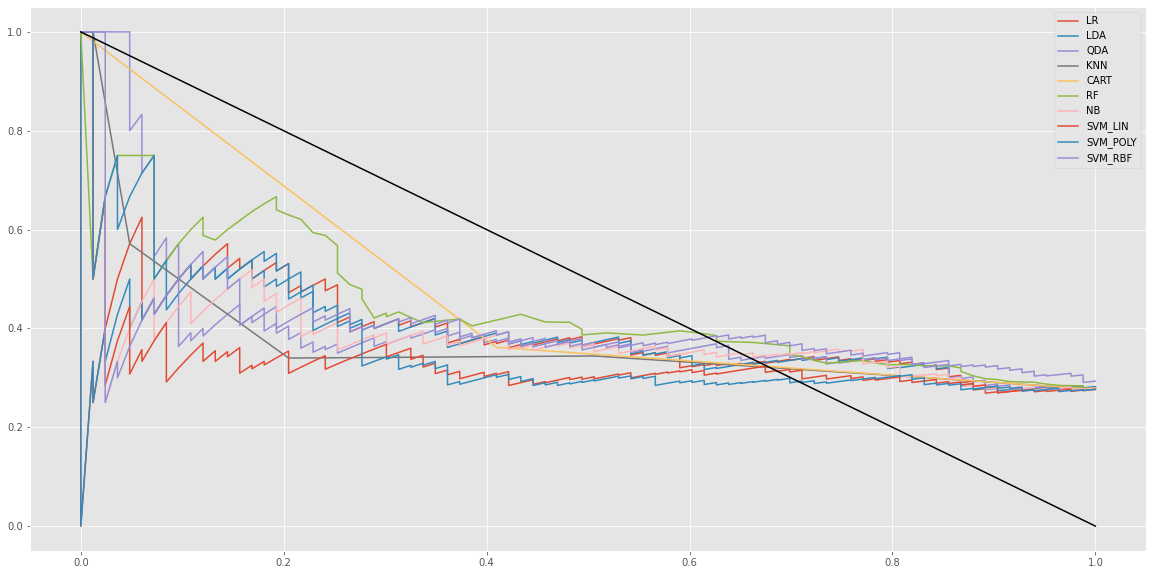

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
i=0
for name, model in models:
    pred_prob = model.predict_proba(X_validation)
    pred = model.predict(X_validation)
    accuracy = (pred == Y_validation).sum()/len(X_validation) * 100
    fscore = f1_score(Y_validation, pred, average='macro')
    precision, recall, thresholds = precision_recall_curve(Y_validation, pred_prob[:,1])

    print("| {} | {:.2f} | {:.4F} | {:.4f} |".format(name, accuracy, fscore, auc(recall, precision)))
    print(classification_report(Y_validation, pred, target_names=["Oui", "Non"], digits=4))

    ax.plot(recall, precision, label=name)

    i+=1
plt.plot([0,1], [1, 0], color="black")
plt.legend()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



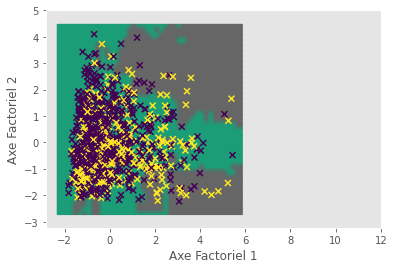

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
centered_quanti = (quanti - quanti.mean())/quanti.std()
X_train_pca = pca.fit_transform(centered_quanti)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train_pca[:,0].min() - .5, X_train_pca[:,0].max() + .5
y_min, y_max = X_train_pca[:,1].min() - .5, X_train_pca[:,1].max() + .5
h = 0.2  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = models[5][1].predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Dark2, shading="gouraud")


plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = data["y"], marker="x")
plt.xlim(X_train_pca[:,0].min()-1, 12)
plt.ylim(X_train_pca[:,1].min()-1, 5)
plt.xlabel("Axe Factoriel 1")
plt.ylabel("Axe Factoriel 2")
plt.show()

## Toutes les variables avec One Hot Encoding  (Prétraitements 3 et 4)

In [ ]:
cat_cols = list(data.select_dtypes(include=['object']).columns)
cat_cols = [x for x in cat_cols if x!="y"]

In [ ]:
data_one_hot = data.drop('y', axis=1)

In [ ]:
for name in cat_cols:
    one_hot = pd.get_dummies(data_one_hot[name], prefix=name)
    data_one_hot = data_one_hot.drop(columns=[name])
    data_one_hot = pd.concat([data_one_hot, one_hot], axis=1)
data_one_hot.head()


,Durée en mois,Montant du crédit,Résidence actuelle depuis,Age en années,Nombre de crédits existants dans cette banque,Nombre de personnes à charge,Statut du compte courant existant_A11,Statut du compte courant existant_A12,Statut du compte courant existant_A13,Statut du compte courant existant_A14,Historique de crédit_A30,Historique de crédit_A31,Historique de crédit_A32,Historique de crédit_A33,Historique de crédit_A34,Objectif_A40,Objectif_A41,Objectif_A410,Objectif_A42,Objectif_A43,Objectif_A44,Objectif_A45,Objectif_A46,Objectif_A48,Objectif_A49,Compte d'épargne_A61,Compte d'épargne_A62,Compte d'épargne_A63,Compte d'épargne_A64,Compte d'épargne_A65,Emploi actuel depuis_A71,Emploi actuel depuis_A72,Emploi actuel depuis_A73,Emploi actuel depuis_A74,Emploi actuel depuis_A75,Taux de versement en pourcentage du revenu disponible_1,Taux de versement en pourcentage du revenu disponible_2,Taux de versement en pourcentage du revenu disponible_3,Taux de versement en pourcentage du revenu disponible_4,Statut personnel et sexe_A91,Statut personnel et sexe_A92,Statut personnel et sexe_A93,Statut personnel et sexe_A94,Autres débiteurs_A101,Autres débiteurs_A102,Autres débiteurs_A103,Propriété_A121,Propriété_A122,Propriété_A123,Propriété_A124,Autres plans de versement_A141,Autres plans de versement_A142,Autres plans de versement_A143,Logement_A151,Logement_A152,Logement_A153,Travail_A171,Travail_A172,Travail_A173,Travail_A174,Téléphone_A191,Téléphone_A192,Travailleur étranger_A201,Travailleur étranger_A202
0,6,1169,4,67,2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,22,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
2,12,2096,3,49,1,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
3,42,7882,4,45,1,2,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0
4,24,4870,4,53,2,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0


In [ ]:
data_one_hot = (data_one_hot - data_one_hot.mean())/data_one_hot.std()
validation_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(data_one_hot, data["y"], test_size=validation_size, random_state=seed)

In [ ]:
# Ne pas exécuter pour tester sans smote
s = SMOTE()
X_train, Y_train = s.fit_resample(X_train, Y_train)

In [ ]:
num_folds = 10
seed = 7
scoring = 'f1'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM_LIN', SVC(kernel="linear", probability=True)))
models.append(('SVM_POLY', SVC(kernel="poly", probability=True)))
models.append(('SVM_RBF', SVC(kernel="rbf", probability=True)))
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.737122 (0.035845)
LDA: 0.739889 (0.029353)
QDA: 0.551309 (0.131948)


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:

KNN: 0.762347 (0.024173)
CART: 0.744707 (0.049685)
RF: 0.819742 (0.037467)
NB: 0.730562 (0.035887)
SVM_LIN: 0.753732 (0.036477)
SVM_POLY: 0.840196 (0.031024)
SVM_RBF: 0.837407 (0.035894)


In [ ]:
for name, model in models:
	model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear



| LR | 72.33 | 0.6895 | 0.6439 |
              precision    recall  f1-score   support

         Oui     0.8681    0.7281    0.7920       217
         Non     0.5000    0.7108    0.5871        83

    accuracy                         0.7233       300
   macro avg     0.6841    0.7195    0.6895       300
weighted avg     0.7663    0.7233    0.7353       300

| LDA | 71.67 | 0.6851 | 0.6433 |
              precision    recall  f1-score   support

         Oui     0.8708    0.7143    0.7848       217
         Non     0.4918    0.7229    0.5854        83

    accuracy                         0.7167       300
   macro avg     0.6813    0.7186    0.6851       300
weighted avg     0.7659    0.7167    0.7296       300

| QDA | 53.33 | 0.5312 | 0.5462 |
              precision    recall  f1-score   support

         Oui     0.8738    0.4147    0.5625       217
         Non     0.3553    0.8434    0.5000        83

    accuracy                         0.5333       300
   macro avg     0.6146    

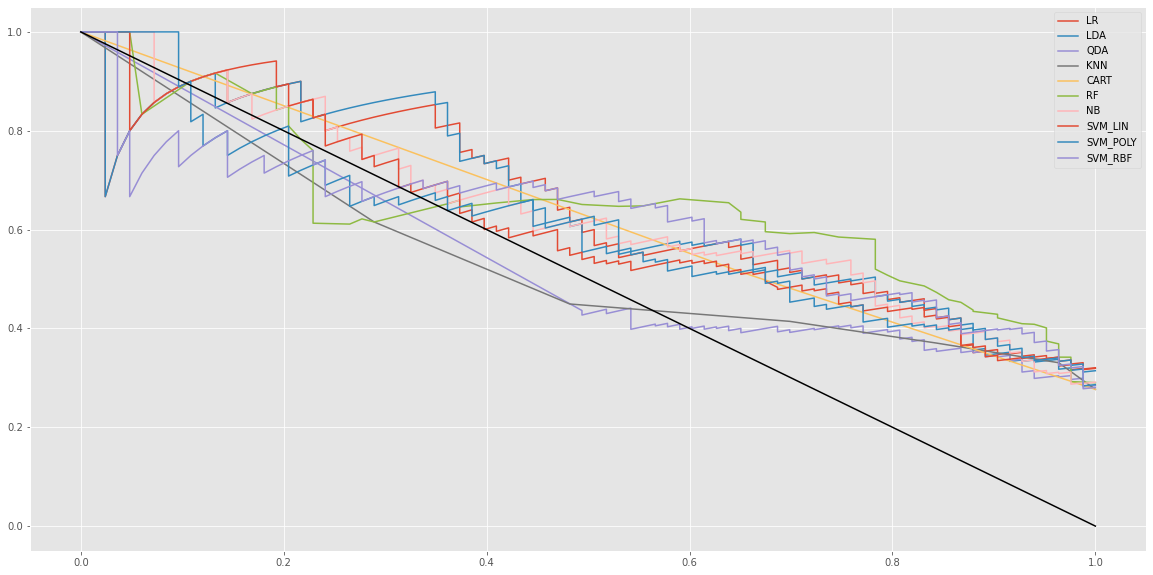

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
i=0
for name, model in models:
    pred_prob = model.predict_proba(X_validation)
    pred = model.predict(X_validation)
    accuracy = (pred == Y_validation).sum()/len(X_validation) * 100
    fscore = f1_score(Y_validation, pred, average='macro')
    precision, recall, thresholds = precision_recall_curve(Y_validation, pred_prob[:,1])

    print("| {} | {:.2f} | {:.4F} | {:.4f} |".format(name, accuracy, fscore, auc(recall, precision)))
    print(classification_report(Y_validation, pred, target_names=["Oui", "Non"], digits=4))

    ax.plot(recall, precision, label=name)

    i+=1
plt.plot([0,1], [1, 0], color="black")
plt.legend()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names



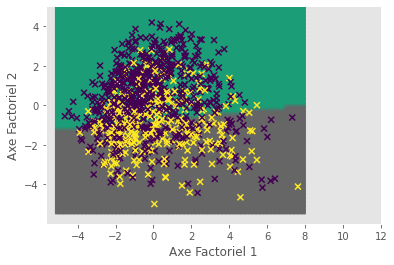

In [ ]:
pca = PCA(n_components=2)
centered_one_hot = (data_one_hot - data_one_hot.mean())/data_one_hot.std()
X_train_pca = pca.fit_transform(centered_one_hot)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train_pca[:,0].min() - .5, X_train_pca[:,0].max() + .5
y_min, y_max = X_train_pca[:,1].min() - .5, X_train_pca[:,1].max() + .5
h = 0.2  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = models[1][1].predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Dark2, shading="gouraud")


plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = data["y"], marker="x")
plt.xlim(X_train_pca[:,0].min()-1, 12)
plt.ylim(X_train_pca[:,1].min()-1, 5)
plt.xlabel("Axe Factoriel 1")
plt.ylabel("Axe Factoriel 2")
plt.show()

| RF | 79.00 | 0.5828 | 0.6484 |


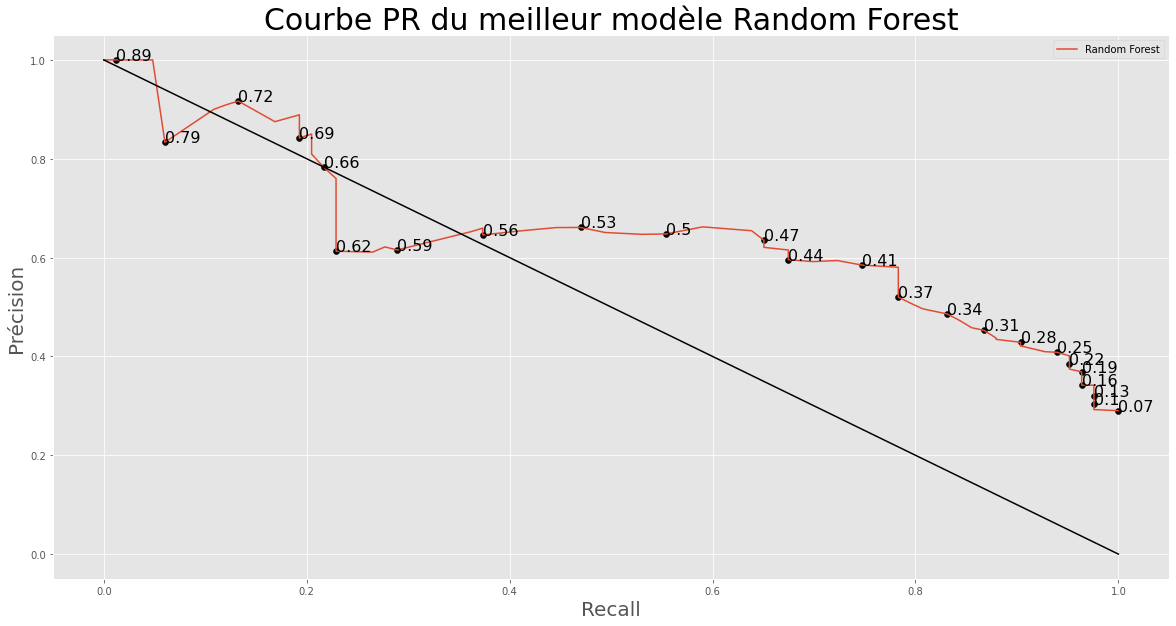

In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20, 10))
rf = models[5][1]
pred_prob = rf.predict_proba(X_validation)
pred = rf.predict(X_validation)
accuracy = (pred == Y_validation).sum()/len(X_validation) * 100
fscore = f1_score(Y_validation, pred)
precision, recall, thresholds = precision_recall_curve(Y_validation, pred_prob[:,1])

print("| {} | {:.2f} | {:.4F} | {:.4f} |".format("RF", accuracy, fscore, auc(recall, precision)))
ax.plot(recall, precision, label="Random Forest")
plt.xlabel("Recall", fontsize=20)
plt.ylabel("Précision", fontsize=20)
plt.title("Courbe PR du meilleur modèle Random Forest", fontsize=30)
for i,xety in enumerate(list(zip(recall, precision))):
    if i%3 !=0:
        continue
    if i < len(thresholds):
        plt.annotate(thresholds[i], xy= xety, fontsize=16)
        plt.scatter(xety[0], xety[1], color="black")

plt.plot([0,1], [1, 0], color="black")
plt.legend()

### Tune RF

| RF(100) | 77.67 | 0.6953 | 0.6337 |
| RF(200) | 79.67 | 0.7301 | 0.6446 |
| RF(300) | 79.33 | 0.7244 | 0.6542 |
| RF(400) | 79.00 | 0.7212 | 0.6425 |
| RF(500) | 79.67 | 0.7301 | 0.6573 |
| RF(600) | 79.00 | 0.7212 | 0.6579 |
| RF(700) | 79.00 | 0.7187 | 0.6494 |
| RF(800) | 81.00 | 0.7500 | 0.6674 |
| RF(900) | 78.67 | 0.7180 | 0.6386 |
| RF(1000) | 79.00 | 0.7162 | 0.6450 |


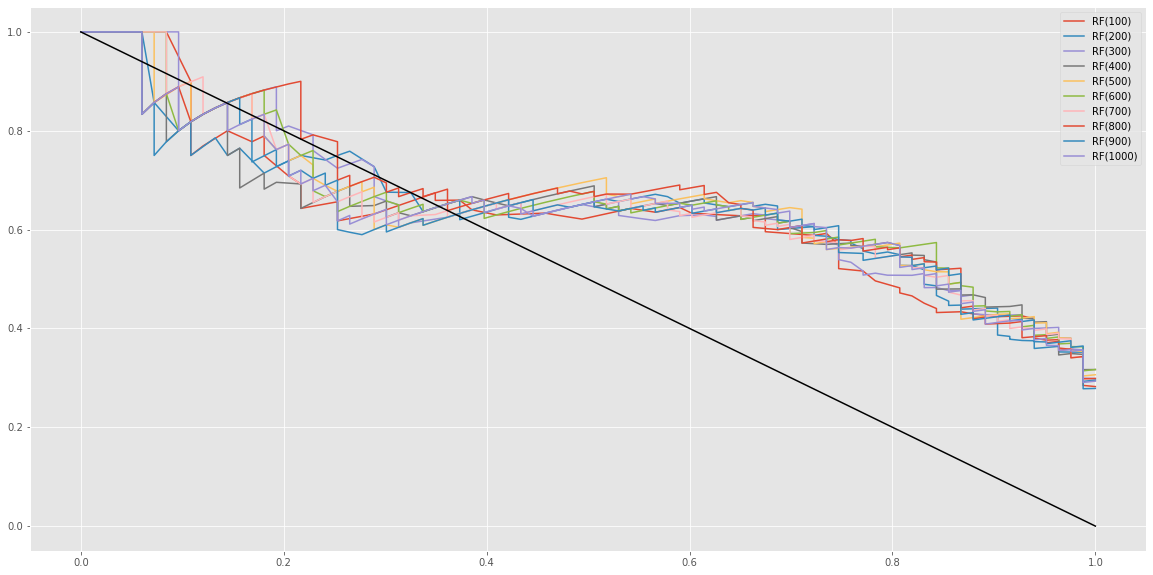

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

for ntree in range(100, 1001, 100):
    rftuned = RandomForestClassifier(n_estimators=ntree, n_jobs=4)
    rftuned.fit(X_train, Y_train)
    pred_prob = rftuned.predict_proba(X_validation)
    pred = rftuned.predict(X_validation)
    accuracy = (pred == Y_validation).sum()/len(X_validation) * 100
    fscore = f1_score(Y_validation, pred, average='macro')
    precision, recall, thresholds = precision_recall_curve(Y_validation, pred_prob[:,1])

    print("| {} | {:.2f} | {:.4F} | {:.4f} |".format("RF("+str(ntree)+")", accuracy, fscore, auc(recall, precision)))
    ax.plot(recall, precision, label="RF("+str(ntree)+")")

plt.plot([0,1], [1, 0], color="black")
plt.legend()

### Tune KNN

| KNN(1) | 0.67 | 0.6154 | 0.5416 |
| KNN(2) | 0.72 | 0.6477 | 0.5590 |
| KNN(3) | 0.65 | 0.6128 | 0.5564 |
| KNN(4) | 0.67 | 0.6204 | 0.5341 |
| KNN(5) | 0.64 | 0.6182 | 0.5398 |
| KNN(6) | 0.68 | 0.6446 | 0.5165 |
| KNN(7) | 0.65 | 0.6287 | 0.5089 |
| KNN(8) | 0.68 | 0.6470 | 0.5013 |
| KNN(9) | 0.63 | 0.6089 | 0.4682 |
| KNN(10) | 0.65 | 0.6253 | 0.4610 |
| KNN(11) | 0.61 | 0.5932 | 0.4289 |
| KNN(12) | 0.64 | 0.6138 | 0.4430 |
| KNN(13) | 0.61 | 0.5954 | 0.4516 |
| KNN(14) | 0.62 | 0.5965 | 0.4727 |
| KNN(15) | 0.61 | 0.5954 | 0.4835 |
| KNN(16) | 0.63 | 0.6191 | 0.4851 |
| KNN(17) | 0.62 | 0.6091 | 0.4866 |
| KNN(18) | 0.63 | 0.6191 | 0.5195 |
| KNN(19) | 0.60 | 0.5950 | 0.5302 |
| KNN(20) | 0.63 | 0.6220 | 0.5365 |
| KNN(21) | 0.60 | 0.5958 | 0.5481 |
| KNN(22) | 0.64 | 0.6288 | 0.5482 |
| KNN(23) | 0.61 | 0.5995 | 0.5425 |
| KNN(24) | 0.62 | 0.6062 | 0.5437 |
| KNN(25) | 0.60 | 0.5950 | 0.5321 |
| KNN(26) | 0.61 | 0.6032 | 0.5370 |
| KNN(27) | 0.60 | 0.5897 | 0.5352 |
| KNN(28) 

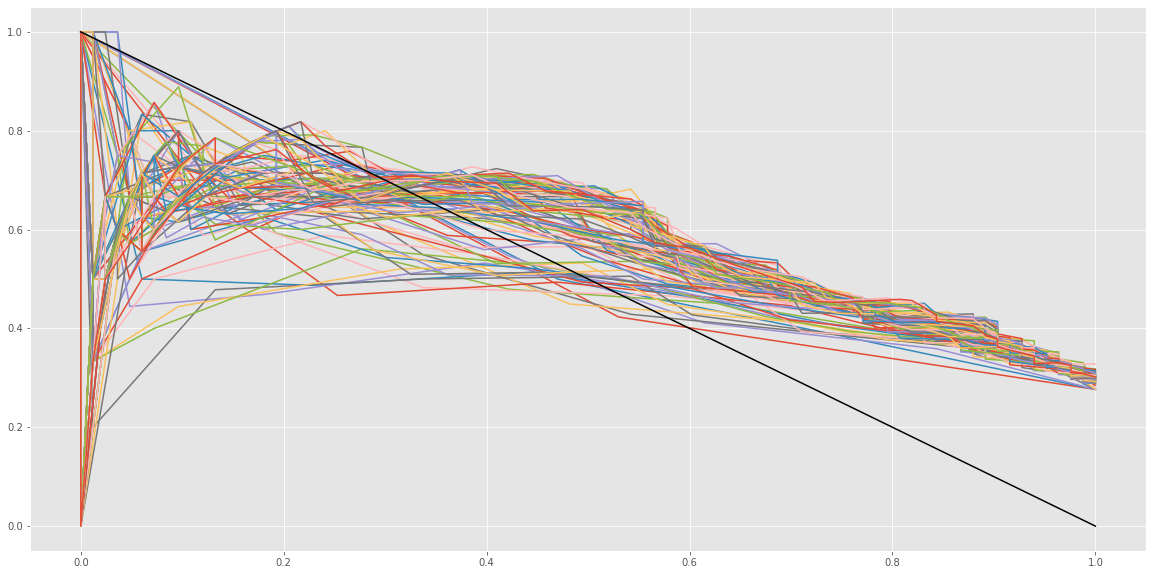

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
accs = []
fscores= []
aucs=[]
for k in range(1, 100):
    rftuned = KNeighborsClassifier(n_neighbors=k)
    rftuned.fit(X_train, Y_train)
    pred_prob = rftuned.predict_proba(X_validation)
    pred = rftuned.predict(X_validation)
    accuracy = (pred == Y_validation).sum()/len(X_validation)
    fscore = f1_score(Y_validation, pred, average='macro')
    precision, recall, thresholds = precision_recall_curve(Y_validation, pred_prob[:,1])

    print("| {} | {:.2f} | {:.4F} | {:.4f} |".format("KNN("+str(k)+")", accuracy, fscore, auc(recall, precision)))
    accs.append(accuracy)
    fscores.append(fscore)
    aucs.append(auc(recall, precision))
    ax.plot(recall, precision, label="KNN("+str(k)+")")

plt.plot([0,1], [1, 0], color="black")

Meilleure valeur de k : 28

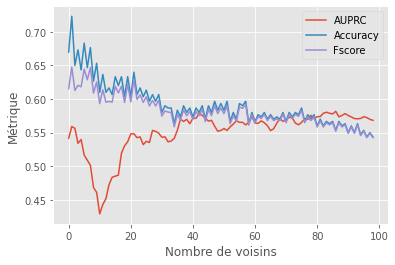

In [ ]:
plt.plot(aucs, label = "AUPRC")
plt.plot(accs, label="Accuracy")
plt.plot(fscores, label="Fscore")
plt.legend()
plt.xlabel("Nombre de voisins")
plt.ylabel("Métrique")
plt.show()